In [1]:
!pip install motuclient

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import os
import subprocess

# Get the current directory where the Python script is executing
current_dir = os.getcwd()

print(current_dir)



/Users/user/Desktop/03 Jupyter Notebook - WAVE Model Products


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install cartopy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [5]:
pip install xarray


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime

In [7]:
!pip install windrose


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [8]:
import windrose
import pandas as pd

In [9]:
REGION_CODE = "01"
NB_CODE = "03"

In [10]:
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)

In [11]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

In [12]:
# Path for netcdf files
data_path = os.getcwd()
print(data_path)

out_path = os.getcwd() + '-' + REGION_CODE + '-' + NB_CODE

# Alternatively, using os.path.join for paths:
out_path = os.path.join(os.getcwd())#, f'{REGION_CODE}-{NB_CODE}')
print(out_path)

/Users/user/Desktop/03 Jupyter Notebook - WAVE Model Products
/Users/user/Desktop/03 Jupyter Notebook - WAVE Model Products


In [13]:
for filename in os.listdir('.'):
    print(filename)

wave_analysis.ipynb
global-reanalysis-wav.nc
.git


In [14]:
for filename in os.listdir(data_path):
    if filename.endswith(".nc"):
        print(filename)

global-reanalysis-wav.nc


In [15]:
# Input netcdf file
import xarray as xr
wav_nc = os.path.join(data_path, filename)

# 3-hourly instantaneous from 2019-01-01 to 2021-05-01
wav_f = "global-reanalysis-wav.nc"

# Build the complete nc path
wav_nc = os.path.join(data_path, wav_f)
print (wav_nc)

/Users/user/Desktop/03 Jupyter Notebook - WAVE Model Products/global-reanalysis-wav.nc


In [16]:
pip install netcdf4


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade xarray netcdf4


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade xarray netcdf4 scipy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Open the nc dataset

wav_ds = xr.open_dataset(wav_nc)
print(wav_ds)

<xarray.Dataset> Size: 227MB
Dimensions:    (latitude: 21, time: 32136, longitude: 21)
Coordinates:
  * latitude   (latitude) float32 84B -4.0 -4.2 -4.4 -4.6 ... -7.6 -7.8 -8.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
  * longitude  (longitude) float32 84B 100.0 100.2 100.4 ... 103.6 103.8 104.0
Data variables:
    VHM0       (time, latitude, longitude) float64 113MB ...
    VMDR       (time, latitude, longitude) float64 113MB ...
Attributes: (12/34)
    CDI:                                       Climate Data Interface version...
    Conventions:                               CF-1.6
    CDO:                                       Climate Data Operators version...
    time_coverage_start:                       20191231-00:00:00
    time_coverage_end:                         20191231-21:00:00
    date_created:                              20200413-21:06:00
    ...                                        ...
    institution:                              

In [21]:
wav_ds

<xarray.Dataset> Size: 227MB
Dimensions:    (latitude: 21, time: 32136, longitude: 21)
Coordinates:
  * latitude   (latitude) float32 84B -4.0 -4.2 -4.4 -4.6 ... -7.6 -7.8 -8.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
  * longitude  (longitude) float32 84B 100.0 100.2 100.4 ... 103.6 103.8 104.0
Data variables:
    VHM0       (time, latitude, longitude) float64 113MB ...
    VMDR       (time, latitude, longitude) float64 113MB ...
Attributes: (12/34)
    CDI:                                       Climate Data Interface version...
    Conventions:                               CF-1.6
    CDO:                                       Climate Data Operators version...
    time_coverage_start:                       20191231-00:00:00
    time_coverage_end:                         20191231-21:00:00
    date_created:                              20200413-21:06:00
    ...                                        ...
    institution:                               Meteo France and Mercator Ocean
    title:                                     Mean fields from global wave m...
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...

In [22]:
wav_ds.data_vars

Data variables:
    VHM0     (time, latitude, longitude) float64 113MB ...
    VMDR     (time, latitude, longitude) float64 113MB ...

In [23]:
wav_ds.coords

Coordinates:
  * latitude   (latitude) float32 84B -4.0 -4.2 -4.4 -4.6 ... -7.6 -7.8 -8.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
  * longitude  (longitude) float32 84B 100.0 100.2 100.4 ... 103.6 103.8 104.0

In [24]:
wav_ds.attrs

{'CDI': 'Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'CDO': 'Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)',
 'time_coverage_start': '20191231-00:00:00',
 'time_coverage_end': '20191231-21:00:00',
 'date_created': '20200413-21:06:00',
 'product': 'GLOBAL_REANALYSIS_WAV_001_032',
 'product_ref_date': '20191231-00:00:00',
 'product_range': 'D',
 'product_user_manual': 'http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-032.pdf',
 'quality_information_document': ' http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-032.pdf',
 'dataset': 'global-reanalysis-wav-001-032',
 'references': 'http://marine.copernicus.eu',
 'credit': 'E.U. Copernicus Marine Service Information (CMEMS)',
 'licence': 'http://marine.copernicus.eu/services-portfolio/service-commitments-and-licence/',
 'contact': 'servicedesk.cmems@mercator-ocean.eu',
 'producer': 'CMEMS - Global Monitoring and Forecasting Centre',
 'area': 'GLO',
 'F

In [25]:
print(type(wav_ds.time))

<class 'xarray.core.dataarray.DataArray'>


In [26]:
# Set the coordinate names (used later for accessing the data)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"


In [27]:
# Set the variable names
hs_name = "VHM0" # wave height
wdir_name = "VMDR" # wave direction

In [ ]:
# Set the point of interest

#s_east_asia
#point = {'x': 102.00,
        # 'y': -6}
# Map area
#lat_min = -21
#lat_max = 9
#lon_min = 70
#lon_max = 130.


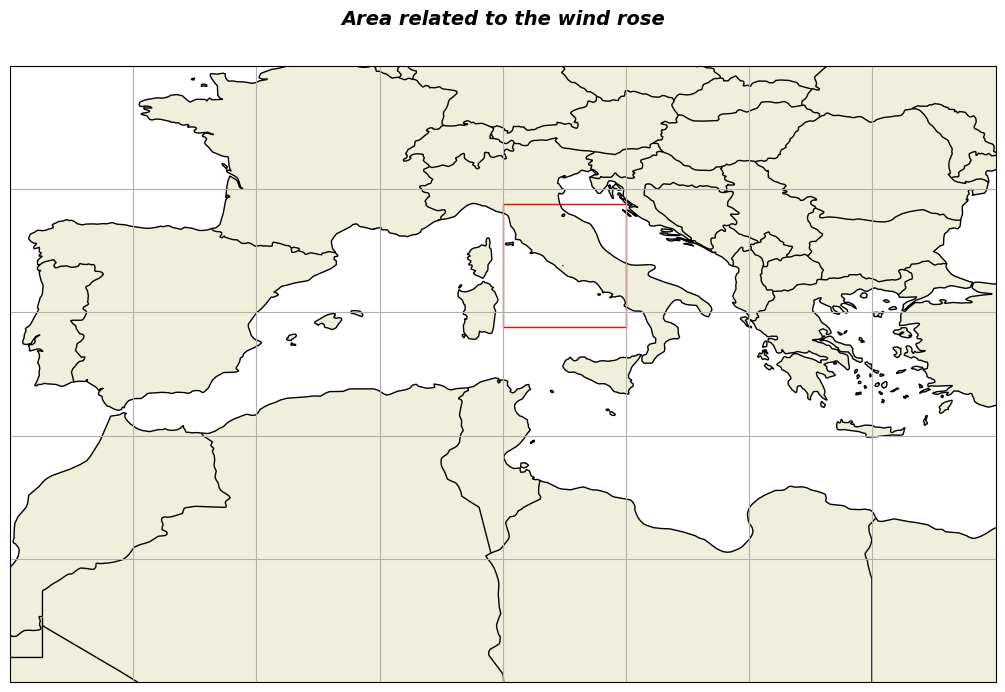

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set the point of interest (example: Rome, Italy)
point = {'x': 12.50,  # Longitude
         'y': 41.90}  # Latitude

# Map area for Europe and the Mediterranean region
lat_min = 25
lat_max = 50
lon_min = -10
lon_max = 30

# Plot configuration
width_inch = 16
height_inch = 8

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

plt.figure(figsize=(width_inch, height_inch))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)

# Draw title
plt.title("Area related to the wind rose", **title_fontstyle)

# We consider a window around the point of interest (+/- 2.5 degrees lat and lon)
ax.add_patch(mpatches.Rectangle(xy=[point["x"] - 2.5, point["y"] - 2.5], width=5, height=5,
                                edgecolor='red', facecolor='none',
                                transform=ccrs.PlateCarree()))

plt.show()
plt.close()


In [29]:
# Extract the sub-dataset for the defined point
ds_sel = wav_ds.sel(latitude=point['y'], longitude=point['x'], method='nearest')

In [30]:
ds_sel

<xarray.Dataset> Size: 771kB
Dimensions:    (time: 32136)
Coordinates:
    latitude   float32 4B -4.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
    longitude  float32 4B 100.0
Data variables:
    VHM0       (time) float64 257kB ...
    VMDR       (time) float64 257kB ...
Attributes: (12/34)
    CDI:                                       Climate Data Interface version...
    Conventions:                               CF-1.6
    CDO:                                       Climate Data Operators version...
    time_coverage_start:                       20191231-00:00:00
    time_coverage_end:                         20191231-21:00:00
    date_created:                              20200413-21:06:00
    ...                                        ...
    institution:                               Meteo France and Mercator Ocean
    title:                                     Mean fields from global wave m...
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...

In [31]:
# Extract the Wave Height
hs_sel = ds_sel[hs_name].round(2)
hs_sel

<xarray.DataArray 'VHM0' (time: 32136)> Size: 257kB
array([2.3 , 2.22, 2.2 , ..., 1.53, 1.56, 1.59])
Coordinates:
    latitude   float32 4B -4.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
    longitude  float32 4B 100.0
Attributes:
    long_name:         Spectral significant wave height (Hm0)
    units:             m
    standard_name:     sea_surface_wave_significant_height
    cell_methods:      time:point area:mean
    type_of_analysis:  spectral analysis
    WMO_code:          100
    _ChunkSizes:       [   1  899 1800]

In [32]:
# Extract the Wave Direction
dir_sel = ds_sel[wdir_name].astype(int)
dir_sel
#time_sel = ds_sel[time_var]

<xarray.DataArray 'VMDR' (time: 32136)> Size: 257kB
array([229, 228, 231, ..., 181, 181, 181])
Coordinates:
    latitude   float32 4B -4.0
  * time       (time) datetime64[ns] 257kB 2009-01-01 ... 2019-12-31T21:00:00
    longitude  float32 4B 100.0
Attributes:
    long_name:         Mean wave direction from (Mdir)
    units:             degree
    standard_name:     sea_surface_wave_from_direction
    cell_methods:      time:point area:mean
    type_of_analysis:  spectral analysis
    WMO_code:          200
    _ChunkSizes:       [   1  899 1800]

In [33]:
# Set the "Significant Wave height" plot parameters:
hs_min = 0.5
hs_max = 5
hs_step = 0.25

# Set the numbers of bins (limits) for hs.
bin_hs = np.arange(hs_min, hs_max, hs_step)

# Set numbers of bins for directions (directions “bundaries”)
# used to compute the distribution by waves direction sector.
bin_dir = 24 # 360 degrees/24 = 15 degrees each

In [34]:
def plot_windrose(ds, normed):
    var_title = ds.long_name

    title = '{}\n' \
            'Lat: {y}[degN]  Lon: {x}[degE]'.format(var_title, y = point['y'], x = point['x'])

    ax = windrose.WindroseAxes.from_ax()
    ax.bar(dir_sel.data, hs_sel.data, bins=bin_hs, nsector=bin_dir, normed=normed, opening=1, edgecolor='k')

    ax.legend(title='Hs')
    ax.set_legend(prop={'size': 'large'})

    plt.title(title)

    # output file
    output_file = os.path.join(out_path, var_title.replace(' ','_')) + ".png"

    # save the output file
    plt.savefig(output_file)

    plt.show()

    plt.close()

    table = ax._info['table']
    return table

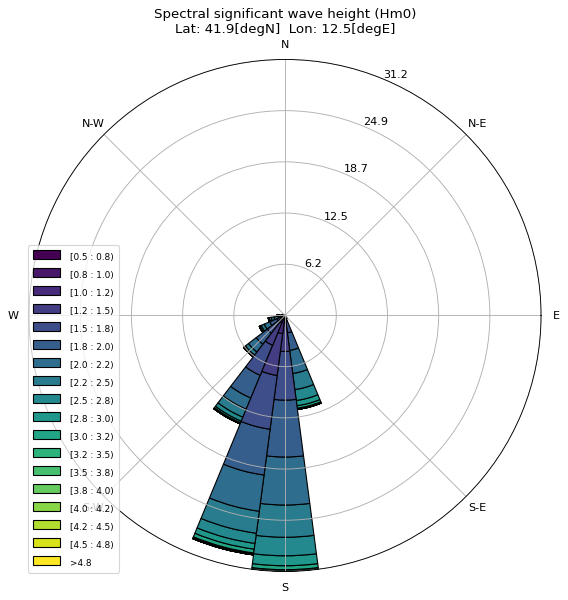

In [35]:
t_normed = plot_windrose(wav_ds[hs_name], True)

In [36]:
t_normed.shape

(18, 24)

In [37]:
df = pd.DataFrame(t_normed)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099577,0.009335,0.003112,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.865073,0.093353,0.018671,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.965522,0.812173,0.332960,0.102689,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.948842,1.804829,0.693926,0.239607,0.049788,0.006224,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.993528,1.702141,0.952203,0.488549,0.130695,0.028006,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.471870,1.185586,0.734379,0.516555,0.186706,0.046677,0.003112,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.054892,0.460543,0.385860,0.326736,0.239607,0.065347,0.024894,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.516555,0.174259,0.177371,0.230271,0.158701,0.108912,0.009335,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.208489,0.080906,0.071571,0.105800,0.093353,0.096465,0.015559,0.0,0.0,0.0


Original DataFrame:
                 SWH   Direction
Timestep                        
2009-01-01  2.261134  108.852005
2009-01-02  0.548215   22.385776
2009-01-03  0.142570   13.144098
2009-01-04  1.937685  317.419205
2009-01-05  1.062360  319.385219
Resampled DataFrame (Yearly Mean):
                 SWH   Direction
Timestep                        
2009-12-31  1.476959  180.912976
2010-12-31  1.470291  191.113715
2011-12-31  1.515512  180.919831
2012-12-31  1.504773  169.269905
2013-12-31  1.424039  183.159571


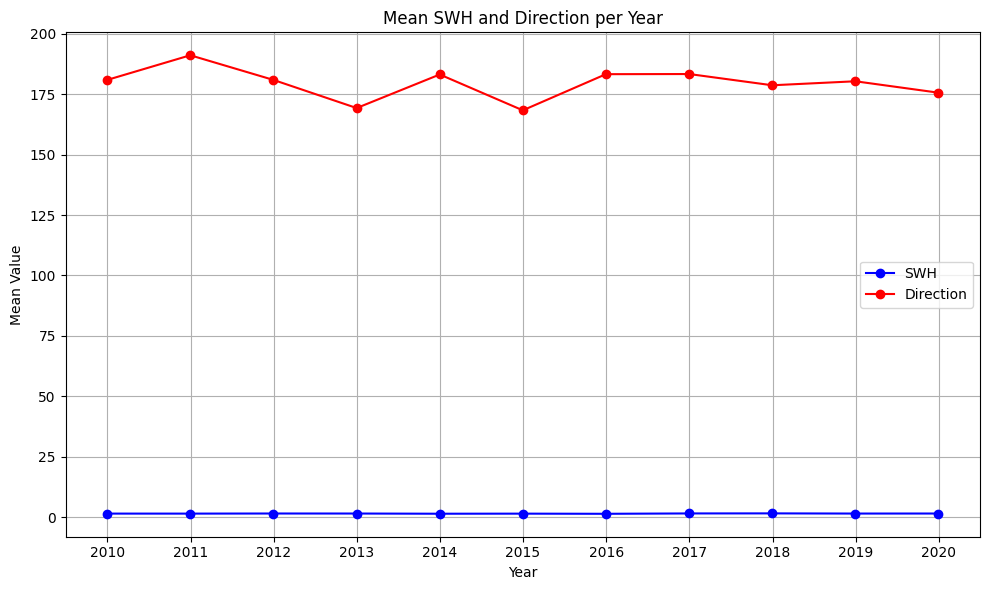

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example date range; replace with your actual date range if available
date_rng = pd.date_range(start='1/1/2009', end='31/12/2019', freq='D')  
hs_sel = np.random.rand(len(date_rng)) * 3  # Simulating SWH values
dir_sel = np.random.rand(len(date_rng)) * 360  # Simulating Direction values

# Creating the DataFrame
df = pd.DataFrame({"Timestep": date_rng, "SWH": hs_sel, "Direction": dir_sel})

# Convert 'Timestep' to datetime format if not already
df['Timestep'] = pd.to_datetime(df['Timestep'])

# Set 'Timestep' as the index
df.set_index('Timestep', inplace=True)

# Show the table to verify
print("Original DataFrame:")
print(df.head())

# Resample the data to get yearly mean values
df_yearly = df.resample('Y').mean()

# Show the resampled table
print("Resampled DataFrame (Yearly Mean):")
print(df_yearly.head())

# Plotting the yearly mean values
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly['SWH'], marker='o', linestyle='-', color='b', label='SWH')
plt.plot(df_yearly.index, df_yearly['Direction'], marker='o', linestyle='-', color='r', label='Direction')
plt.title('Mean SWH and Direction per Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
# Display the first few rows
print(df.head())

# Display the last few rows
print(df.tail())

# Display summary statistics
print(df.describe())

# Display DataFrame information
print(df.info())


                 SWH   Direction
Timestep                        
2009-01-01  2.261134  108.852005
2009-01-02  0.548215   22.385776
2009-01-03  0.142570   13.144098
2009-01-04  1.937685  317.419205
2009-01-05  1.062360  319.385219
                 SWH   Direction
Timestep                        
2019-12-27  2.472102  126.283041
2019-12-28  1.996579  319.010535
2019-12-29  1.012325  188.770737
2019-12-30  2.205662  136.862770
2019-12-31  0.723228  214.295932
               SWH    Direction
count  4017.000000  4017.000000
mean      1.486924   179.545297
std       0.869546   104.556004
min       0.000294     0.027002
25%       0.716762    88.138854
50%       1.489933   177.414251
75%       2.239752   271.951549
max       2.999581   359.885986
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4017 entries, 2009-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SWH        4017 non-null   float64
 1   D

In [93]:
# Resample the data to get yearly mean values
df_freq = df.resample('D').mean()

# Show the resampled table
print(df_freq)
print(df_freq.head())

                 SWH   Direction
Timestep                        
2009-01-01  2.261134  108.852005
2009-01-02  0.548215   22.385776
2009-01-03  0.142570   13.144098
2009-01-04  1.937685  317.419205
2009-01-05  1.062360  319.385219
...              ...         ...
2019-12-27  2.472102  126.283041
2019-12-28  1.996579  319.010535
2019-12-29  1.012325  188.770737
2019-12-30  2.205662  136.862770
2019-12-31  0.723228  214.295932

[4017 rows x 2 columns]
                 SWH   Direction
Timestep                        
2009-01-01  2.261134  108.852005
2009-01-02  0.548215   22.385776
2009-01-03  0.142570   13.144098
2009-01-04  1.937685  317.419205
2009-01-05  1.062360  319.385219


In [94]:
swh_mean = df["SWH"].mean()
print(f'Mean Significant Wave Height: {swh_mean}')
#or by using numpy calculation method
df['SWH'] = np.round(df['SWH'], 2)  # Round SWH values to 2 decimal places using NumPy
mean_swh = np.mean(df['SWH'])  # Calculate mean SWH using NumPy
print(f"Mean SWH: {mean_swh}")


Mean Significant Wave Height: 1.4869239732580655
Mean SWH: 1.4869529499626588


In [96]:
#resampling by numpy
min_swh_daily = df['SWH'].resample('D').min()
max_swh_daily = df['SWH'].resample('D').max()
min_swh_monthly = df['SWH'].resample('M').min()
max_swh_monthly = df['SWH'].resample('M').max()
print(min_swh_daily)
print(max_swh_daily)
print(min_swh_monthly)
print(max_swh_monthly)


Timestep
2009-01-01    2.26
2009-01-02    0.55
2009-01-03    0.14
2009-01-04    1.94
2009-01-05    1.06
              ... 
2019-12-27    2.47
2019-12-28    2.00
2019-12-29    1.01
2019-12-30    2.21
2019-12-31    0.72
Freq: D, Name: SWH, Length: 4017, dtype: float64
Timestep
2009-01-01    2.26
2009-01-02    0.55
2009-01-03    0.14
2009-01-04    1.94
2009-01-05    1.06
              ... 
2019-12-27    2.47
2019-12-28    2.00
2019-12-29    1.01
2019-12-30    2.21
2019-12-31    0.72
Freq: D, Name: SWH, Length: 4017, dtype: float64
Timestep
2009-01-31    0.14
2009-02-28    0.07
2009-03-31    0.11
2009-04-30    0.05
2009-05-31    0.09
              ... 
2019-08-31    0.01
2019-09-30    0.04
2019-10-31    0.05
2019-11-30    0.12
2019-12-31    0.16
Freq: ME, Name: SWH, Length: 132, dtype: float64
Timestep
2009-01-31    2.90
2009-02-28    2.98
2009-03-31    2.76
2009-04-30    2.93
2009-05-31    2.95
              ... 
2019-08-31    2.92
2019-09-30    2.93
2019-10-31    2.99
2019-11-30    2.98


Daily Min SWH:
 Timestep
2009-01-01    2.26
2009-01-02    0.55
2009-01-03    0.14
2009-01-04    1.94
2009-01-05    1.06
              ... 
2019-12-27    2.47
2019-12-28    2.00
2019-12-29    1.01
2019-12-30    2.21
2019-12-31    0.72
Freq: D, Name: SWH, Length: 4017, dtype: float64
Daily Max SWH:
 Timestep
2009-01-01    2.26
2009-01-02    0.55
2009-01-03    0.14
2009-01-04    1.94
2009-01-05    1.06
              ... 
2019-12-27    2.47
2019-12-28    2.00
2019-12-29    1.01
2019-12-30    2.21
2019-12-31    0.72
Freq: D, Name: SWH, Length: 4017, dtype: float64
Monthly Min SWH:
 Timestep
2009-01-31    0.14
2009-02-28    0.07
2009-03-31    0.11
2009-04-30    0.05
2009-05-31    0.09
              ... 
2019-08-31    0.01
2019-09-30    0.04
2019-10-31    0.05
2019-11-30    0.12
2019-12-31    0.16
Freq: ME, Name: SWH, Length: 132, dtype: float64
Monthly Max SWH:
 Timestep
2009-01-31    2.90
2009-02-28    2.98
2009-03-31    2.76
2009-04-30    2.93
2009-05-31    2.95
              ... 
2019-08-

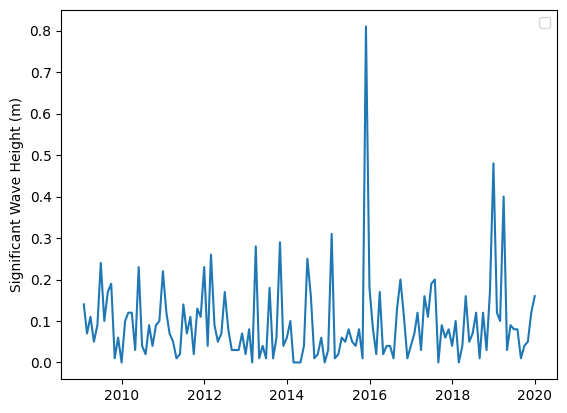

In [97]:
# Calculate min and max SWH over time

min_swh_daily = df['SWH'].resample('D').min()  # Daily resampling
max_swh_daily = df['SWH'].resample('D').max()  # Daily resampling

min_swh_monthly = df['SWH'].resample('M').min()  # Monthly resampling
max_swh_monthly = df['SWH'].resample('M').max()  # Monthly resampling

# Print min and max SWH for daily
print("Daily Min SWH:\n", min_swh_daily)
print("Daily Max SWH:\n", max_swh_daily)

# Print min and max SWH for monthly
print("Monthly Min SWH:\n", min_swh_monthly)
print("Monthly Max SWH:\n", max_swh_monthly)
plt.plot(min_swh_monthly)
plt.ylabel('Significant Wave Height (m)')
plt.legend()

Overall Mean Values:
SWH            1.486953
Direction    179.545297
dtype: float64
                 SWH   Direction
Timestep                        
2009-12-31  1.477041  180.912976
2010-12-31  1.470219  191.113715
2011-12-31  1.515644  180.919831
2012-12-31  1.505055  169.269905
2013-12-31  1.424192  183.159571
2014-12-31  1.457945  168.331376
2015-12-31  1.394822  183.287193
2016-12-31  1.542432  183.344630
2017-12-31  1.565890  178.696554
2018-12-31  1.494082  180.351682
2019-12-31  1.508959  175.628574
Yearly Mean Values:


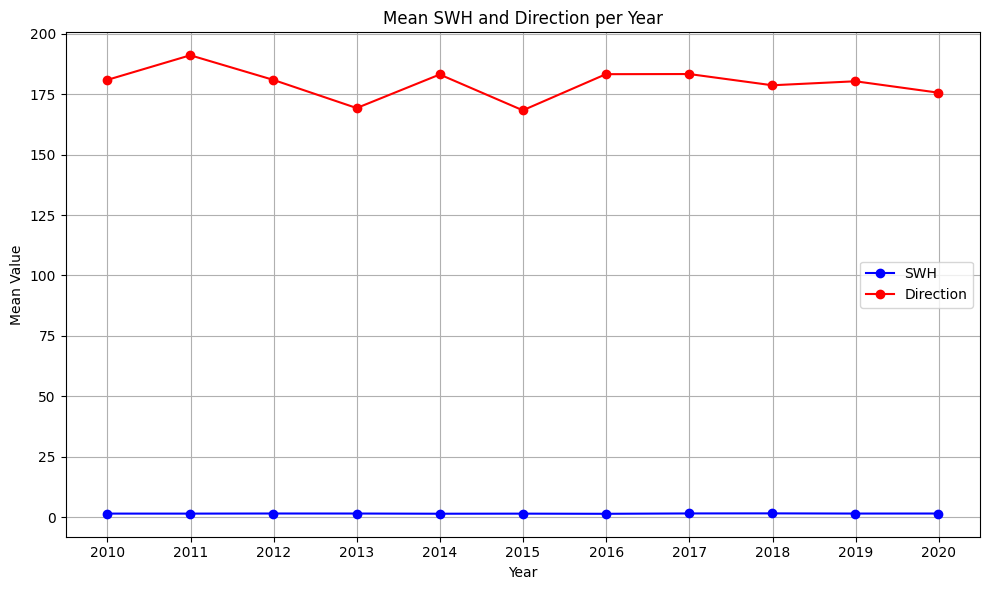

In [98]:
 #Aggregating data
mean_values = df.mean()
print("Overall Mean Values:")
print(mean_values)

# Group by a time frequency (e.g., yearly) and calculate the mean
yearly_mean = df.resample('Y').mean()
print(yearly_mean)

print("Yearly Mean Values:")


# Plotting the yearly mean values
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean['SWH'], marker='o', linestyle='-', color='b', label='SWH')
plt.plot(yearly_mean.index, yearly_mean['Direction'], marker='o', linestyle='-', color='r', label='Direction')
plt.title('Mean SWH and Direction per Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [99]:
 #data frame 
start_date = df.index.min()
end_date = df.index.max()
print(start_date)
print(end_date)

2009-01-01 00:00:00
2019-12-31 00:00:00


In [81]:
# Save the table
fname_table = "windrose_data.csv"
output_table =  os.path.join(out_path, fname_table)
df.to_csv(output_table )

In [82]:
output_table

'/Users/user/Desktop/03 Jupyter Notebook - WAVE Model Products/windrose_data.csv'